## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_flights = pd.read_csv('flights_random_subset.csv')
df_passengers = pd.read_csv('passengers_random_subset.csv')
df_fuel = pd.read_csv('fuel_consumption.csv')

In [3]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-09-10,AA,AA,AA,1787,AA,N967UW,1787,14100,PHL,...,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05-17,DL,DL_CODESHARE,DL,3343,9E,N8783E,3343,13795,OAJ,...,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-05,AA,AA_CODESHARE,AA,4102,MQ,N900AE,4102,14730,SDF,...,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-09-08,WN,WN,WN,2510,WN,N7831B,2510,13495,MSY,...,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-03-19,DL,DL,DL,2854,DL,N1402A,2854,10397,ATL,...,1590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,2,3900,18,10,21,151,109,75,67,...,US,United States,1,194,1,2019,9,1,F,DU
1,0,1,40770,160,117,0,0,952,165,142,...,US,United States,6,614,1,2018,10,2,F,DU
2,16,13,611780,2353,1999,311,9857,2335,3918,3568,...,US,United States,6,888,1,2016,1,5,F,DU
3,9,9,306000,1494,1311,0,0,674,1176,966,...,US,United States,6,655,1,2015,7,2,F,DU
4,5,5,178125,750,713,243,2613,1825,1168,1050,...,US,United States,6,694,1,2017,12,4,F,DU


In [5]:
df_fuel.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [6]:
# arrival delay may already be 'total delay'
delay_cols = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df_flights['all_delay'] = df_flights[delay_cols].sum(axis = 1)

In [7]:
df_flights['all_delay'].describe()

count    50000.000000
mean        17.457940
std         94.476369
min        -70.000000
25%        -15.000000
50%         -6.000000
75%          7.000000
max       2884.000000
Name: all_delay, dtype: float64

In [8]:
df_flights['arr_delay'].describe()

count    49028.000000
mean         5.092233
std         49.559097
min        -70.000000
25%        -15.000000
50%         -6.000000
75%          7.000000
max       1442.000000
Name: arr_delay, dtype: float64

<AxesSubplot:>

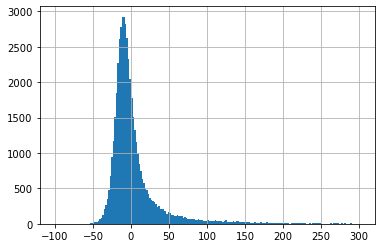

In [12]:
df_flights['arr_delay'].hist(bins = 200, range = [-100, 300])

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [116]:
df_flights['fl_month'] = pd.DatetimeIndex(df_flights['fl_date']).month
df_flights_month = df_flights.groupby('fl_month')['all_delay']

In [117]:
# bar chart
df_flights_month.mean()

fl_month
1     17.586118
2     22.026786
3     14.121065
4     15.146040
5     25.322500
6     25.639485
7     25.842482
8     23.654167
9     10.824390
10     8.341357
11    13.669231
12    18.862385
Name: all_delay, dtype: float64

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.

Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [118]:
# lost access to weather API?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [119]:
# convert to datetime, extract the hour only

df_flights['taxi_in'].head()

0     8.0
1    29.0
2     5.0
3     4.0
4     4.0
Name: taxi_in, dtype: float64

In [126]:
df_flights['dep_time'].head()

0    00:53
1    20:24
2    10:23
3    05:53
4    17:04
Name: dep_time, dtype: object

In [125]:
df_flights['dep_time'] = df_flights['dep_time'].astype(str)
df_flights['dep_time'] = df_flights['dep_time'].str[:-2]
df_flights['dep_time'] = df_flights['dep_time'].str.pad(4, side = 'left', fillchar = '0')
# df_flights['dep_time'] = df_flights['dep_time'].str[:2] + ':' + df_flights['dep_time'].str[-2:]

In [129]:
df_flights['dep_hour'] = df_flights['dep_time'].str[0:2].astype(int)
df_flights['dep_hour'].head()

0     0
1    20
2    10
3     5
4    17
Name: dep_hour, dtype: int32

In [136]:
taxi_in_time_by_time = df_flights.groupby('dep_hour')['taxi_in'].mean()
taxi_in_time_by_time

dep_hour
0     7.000000
1     9.666667
2     5.800000
3     4.000000
4     6.733333
5     8.213930
6     8.451299
7     8.935583
8     6.990196
9     7.117871
10    7.331104
11    7.528777
12    8.074303
13    7.620968
14    7.289753
15    7.301003
16    7.445693
17    8.226415
18    7.765306
19    7.263359
20    7.081448
21    7.689655
22    6.063830
23    8.073171
Name: taxi_in, dtype: float64

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [66]:
# where clause for "dep_delay", check for flights with only departure delay

# count of departure delays
dep_delay_count = df_flights['dep_delay'].count()

# count of total delays
all_delay_count = df_flights['all_delay'].count()

# percentage of departure delays
dep_delay_count / all_delay_count * 100

98.26

#### **Task 6**: How many states cover 50% of US air traffic? 

In [15]:
# do it for dest as well
df_flights['origin_city_name'].head()

0                 Philadelphia, PA
1    Jacksonville/Camp Lejeune, NC
2                   Louisville, KY
3                  New Orleans, LA
4                      Atlanta, GA
Name: origin_city_name, dtype: object

In [16]:
df_flights['origin_state'] = df_flights['origin_city_name'].str[-2:]
df_flights['origin_state'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: origin_state
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [17]:
df_by_state = df_flights.groupby('origin_state').size().sort_values(ascending = False)

In [19]:
# CA, TX, FL, IL, NY, GA, NC make up ~2500 flights, therefore 50% of all flights from this sample. Therefore 7 states cover 50% of US air traffic.

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [20]:
# check arr_delay - dep_delay
# null = if a plane leaves late, it will arrive late
# statistical test to check if that is the case
arr_dep_dif = df_flights['arr_delay'] - df_flights['dep_delay']
arr_dep_dif.describe()

count    4894.000000
mean       -4.980180
std        13.640887
min       -53.000000
25%       -13.000000
50%        -6.000000
75%         1.000000
max       133.000000
dtype: float64

In [21]:
# based on the mean value above, we can determine that generally, arrival delay is shorter than departure delay.
# checking whether presence of departure delay affects estimated arrival time

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [28]:
# do it for destination as well
df_flights_by_airport = df_flights.groupby('origin_airport_id').size().sort_values(ascending = False)

In [29]:
df_flights_by_airport.head(10)

origin_airport_id
10397    2450
13930    2446
11298    1827
11292    1765
12892    1635
11057    1591
14747    1181
14107    1141
12266    1134
11433    1082
dtype: int64

In [30]:
# checking correlation between number of flights and number of passengers
df_passengers_by_flights = df_passengers.sort_values('departures_performed', ascending = False)
df_passengers_by_flights.head()
# generally, bigger number of flights leads to bigger number of passengers

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
4177,810,810,36450000,99630,82123,176909,0,100,31776,18893,...,US,United States,6,608,1,2018,1,1,F,DU
1891,646,646,20425900,82688,60744,245470,0,163,30613,18256,...,US,United States,6,608,1,2019,8,1,F,DU
790,541,540,16897100,67645,51751,30706,0,102,18616,11206,...,US,United States,6,608,1,2015,5,1,F,DU
4396,533,533,24473053,81815,75439,45503,603034,2565,196506,180007,...,US,United States,6,622,1,2016,10,6,F,DU
3850,413,410,12972100,52480,42695,126329,0,216,21913,15187,...,US,United States,6,608,1,2017,11,1,F,DU


In [24]:
# Amount of traffic these 10 airports cover in percentage:
num_flights_top_10_airports = sum(df_flights_by_airport.head(10))
num_flights_top_10_airports / 5000 * 100
# 32.34% of traffic are covered by the 10 airports.

32.34

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [24]:
# average monthly delay per air carrier

# group by month, carrier, sum all delays in that month
df_flights_month_delay = pd.DataFrame(df_flights.groupby(['fl_month', 'mkt_unique_carrier']).sum('all_delay')).reset_index()
df_flights_month_delay
# group by carrier, mean all delays
df_flights_month_delay_carr = df_flights_month_delay.groupby('mkt_unique_carrier', as_index = False)['all_delay'].mean()
df_flights_month_delay_carr

,mkt_unique_carrier,all_delay
0,AA,1939.750000
1,AS,169.083333
2,B6,538.166667
3,DL,1203.166667
4,F9,276.083333
5,G4,97.090909
6,HA,92.333333
7,NK,159.250000
8,UA,2243.583333
9,VX,86.666667


In [34]:
# distance convered monthly per carriers

# group by month, carrier, sum all distance in that month
df_flights_month_distance = pd.DataFrame(df_flights.groupby([per, 'mkt_unique_carrier']).sum('distance')).reset_index()
df_flights_month_distance
# group by carrier, mean all distance
df_flights_month_distance_carr = df_flights_month_distance.groupby('mkt_unique_carrier', as_index = False)['distance'].mean()
df_flights_month_distance_carr['']

,mkt_unique_carrier,distance
0,AA,35844.708333
1,AS,11798.541667
2,B6,9464.291667
3,DL,30688.708333
4,F9,3682.916667
5,G4,2916.800000
6,HA,1701.045455
7,NK,5568.916667
8,UA,32850.083333
9,VX,5311.333333


In [35]:
# number of passengers per air carrier
# redo sample for only carriers that are present in flights
df_passengers_by_carrier = df_passengers.groupby('unique_carrier')['passengers'].sum()
df_passengers_by_carrier

unique_carrier
04Q      204
09Q     6095
0Q         2
0RQ        7
0WQ       28
       ...  
Z3       113
Z3Q     1065
ZK       833
ZW     45738
ZX      3931
Name: passengers, Length: 240, dtype: int64

In [36]:
# total fuel consumption per air carrier
df_fuel_by_carrier = df_fuel.groupby('unique_carrier')['total_gallons'].sum()
df_fuel_by_carrier

unique_carrier
09Q     41034111.0
0JQ       838615.0
0WQ      3253401.0
1BQ      6672792.0
23Q       856284.0
          ...     
X9     176878857.0
XP      19013295.0
YV             0.0
YX     287098389.0
ZW     130683426.0
Name: total_gallons, Length: 62, dtype: float64

In [50]:
# average fuel consumption per passenger per km by carrier
df_fuel_passengers = pd.merge(df_fuel_by_carrier, df_passengers_by_carrier, on = 'unique_carrier').reset_index()
df_fuel_passengers.rename(columns = {'unique_carrier': 'mkt_unique_carrier'}, inplace = True)
df_fuel_passengers_distance = pd.merge(df_fuel_passengers, df_flights_month_distance_carr, on = 'mkt_unique_carrier')

df_fuel_passengers_distance['fuel_pass_km'] = df_fuel_passengers_distance['total_gallons'] / df_fuel_passengers_distance['passengers'] / df_fuel_passengers_distance['distance']
df_fuel_passengers_distance.head()

,mkt_unique_carrier,total_gallons,passengers,distance,fuel_pass_km
0,AA,1.663489e+10,1528250,35844.708333,0.303669
1,AS,2.678455e+09,267474,11798.541667,0.848740
2,B6,3.767060e+09,476842,9464.291667,0.834718
3,DL,1.655025e+10,1690715,30688.708333,0.318974
4,F9,1.125294e+09,204130,3682.916667,1.496813
